## Este é um estudo de caso de tamanho de mercado.
Iremos analisar um dataset de veículos elétricos, será um processo para estimar as vendas potenciais de um produto ou serviço dentro de um determinado segmento de mercado.
No contexto dos veículos eléctricos (VE), envolve a avaliação do volume total de registos de VE para compreender o crescimento do mercado, prever tendências futuras e ajudar as partes interessadas a tomar decisões informadas sobre a produção, o desenvolvimento de infra-estruturas e a tomada de decisões políticas.


In [2]:
import pandas as pd
ev_data = pd.read_csv("/content/drive/MyDrive/Kaggle_course/Electric_Vehicle_Population_Data.csv")
print(ev_data.head())


   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

## Iremos limpar o conjunto de dados antes de prosseguir.


In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

Existem alguns dados faltantes, porém nenhum que irá interferir no nosso estudo.
Então iremos apenas removê-los.

In [5]:
ev_data = ev_data.dropna()

##Para essa análise, podemos explorar as seguintes áreas:

**- Adoção de VE ao longo do tempo:** Analise o crescimento da população de VE por ano modelo.

**- Distribuição Geográfica:** Entenda aonde os VE's são mais comumente registrados (por exemplo, por condado ou cidade).

**- Tipos de VE:** Detalhamento do conjunto de dados por tipo de veículo elétrico.

**- Popularidade de Marca e Modelo:** Identifique as marcas e modelos mais populares entre os VEs registrados.

**- Análise de autonomia elétrica:** analise a autonomia elétrica dos veículos para ver como a tecnologia VE está progredindo.

**- Crescimento estimado no tamanho do mercado:** Analise e encontre o crescimento estimado no tamanho do mercado de veículos elétricos.

<ipython-input-10-4c01fc891fba>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


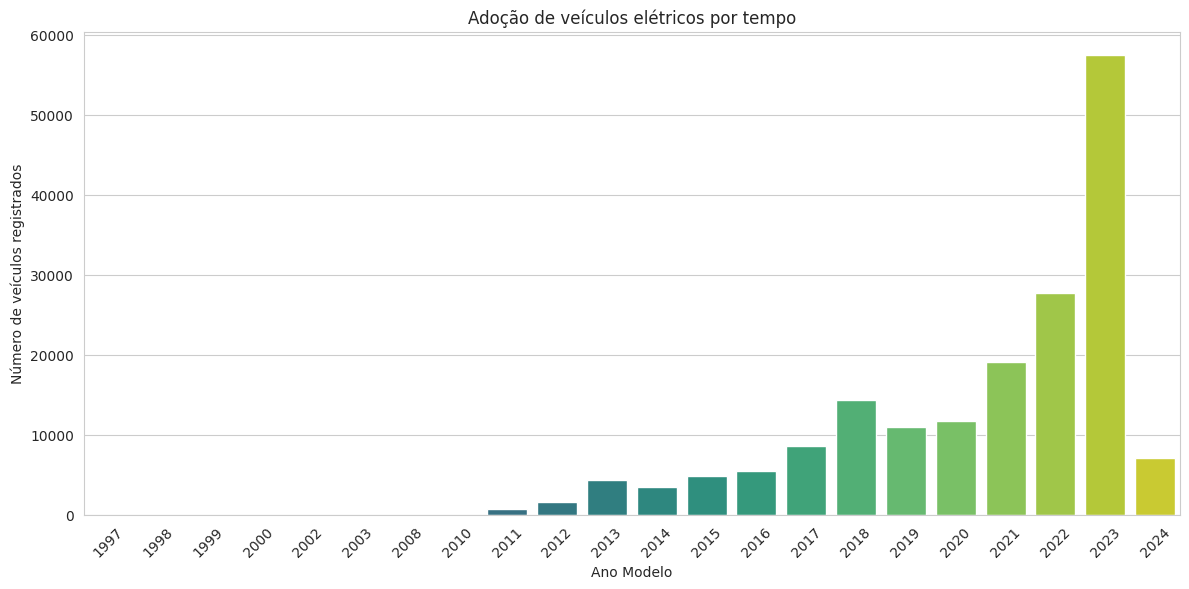

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Adoção de VE ao longo do tempo
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('Adoção de veículos elétricos por tempo')
plt.xlabel('Ano Modelo')
plt.ylabel('Número de veículos registrados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

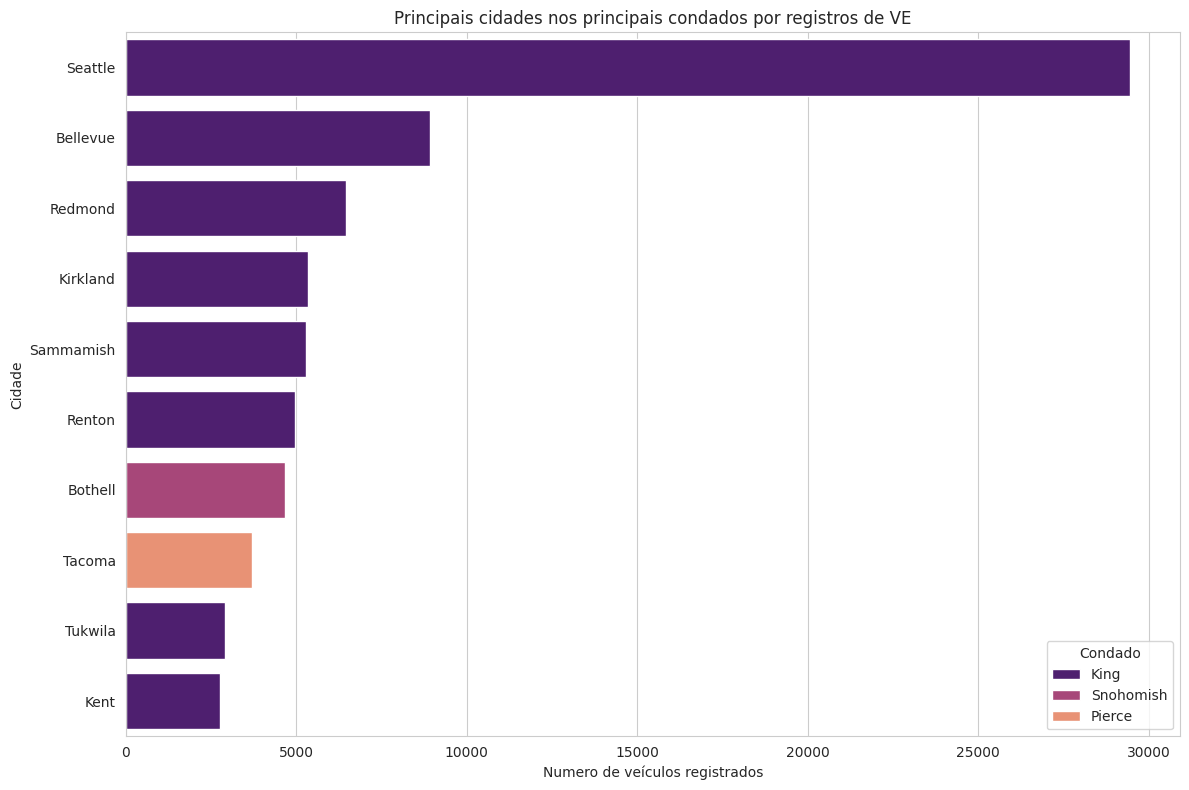

In [12]:
# Distribuição geográfica por condado
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# Filtrando o conjunto de dados para esses principais condados
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analisando a distribuição de VE's nas cidades desses principais condados
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize as 10 pricipais
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Principais cidades nos principais condados por registros de VE')
plt.xlabel('Numero de veículos registrados')
plt.ylabel('Cidade')
plt.legend(title='Condado')
plt.tight_layout()
plt.show()

O gráfico acima compara o número de veículos elétricos registrados em várias cidades de três condados: King, Snohomish e Pierce. As barras horizontais representam cidades e seu comprimento corresponde ao número de veículos matriculados, codificados por cores por município.

- Seattle, que fica no condado de King, tem o maior número de registros de veículos elétricos por uma margem significativa, superando em muito as outras cidades específicas.
- Bellevue e Redmond, também em King County, seguem Seattle com os próximos registros mais altos, embora estes sejam consideravelmente menores que os de Seattle.
- Cidades no condado de Snohomish, como Kirkland e Sammamish, apresentam registros moderados de VE.
- Tacoma e Tukwila, representando o condado de Pierce, têm o menor número de registros de EV entre as cidades específicas, com Tacoma predominantemente à frente de Tukwila.
- A maioria das cidades mostradas são do Condado de King, que parece dominar os registros de VE entre os três condados.
- No geral, os gráficos indicam que a adoção de VE não é uniforme nas cidades e é mais especializada em certas áreas, especialmente em King County.

A seguir, vamos explorar os tipos de veículos elétricos representados neste conjunto de dados. Compreender a divisão entre diferentes tipos de EV, como veículos elétricos a bateria (BEV) e veículos elétricos híbridos plug-in (PHEV), pode fornecer informações sobre as preferências do consumidor e os padrões de adoção de soluções elétricas puramente elétricas versus soluções elétricas híbridas.
Então, vamos visualizar a distribuição dos tipos de veículos elétricos para ver quais categorias são mais populares entre os veículos cadastrados:


<ipython-input-15-d6776c5f0c18>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


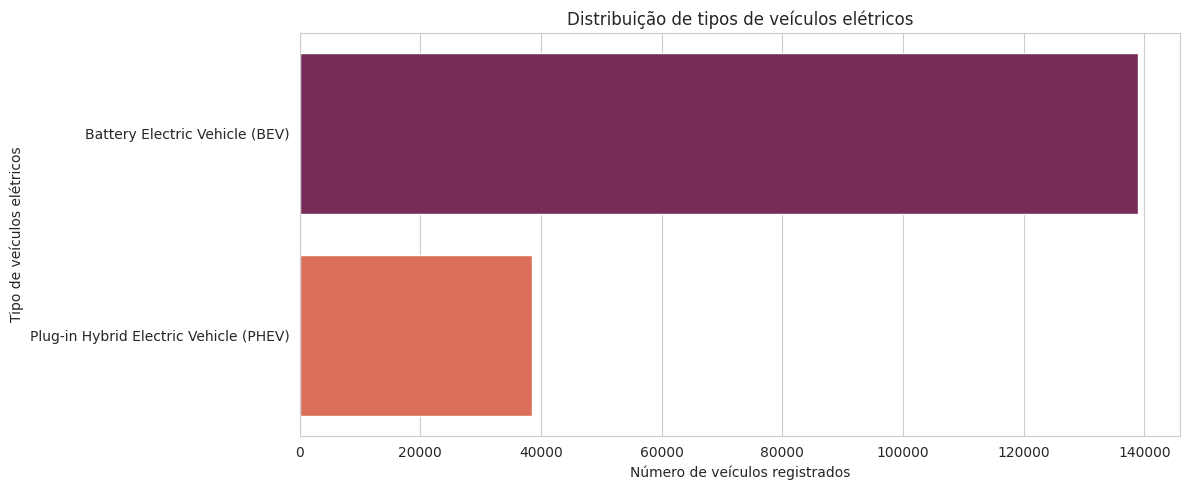

In [15]:
# analisando a distribuição de tipos de veículos elétricos
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribuição de tipos de veículos elétricos')
plt.xlabel('Número de veículos registrados')
plt.ylabel('Tipo de veículos elétricos')
plt.tight_layout()
plt.show()

O gráfico acima mostra que os BEVs são mais populares ou preferidos aos PHEVs entre os veículos elétricos registrados nos Estados Unidos.

Vamos agora nos concentrar na popularidade dos fabricantes e modelos de veículos elétricos entre os veículos registrados. Esta análise nos ajudará a identificar quais os fabricantes e modelos específicos que dominam o mercado de VE, indicando potencialmente as preferências dos consumidores, a fidelidade à marca e o sucesso das estratégias de vários fabricantes na promoção da mobilidade eléctrica.

Então, vamos dar uma olhada nos fabricantes mais populares e, em seguida, detalhar os modelos mais populares dentro desses fabricantes:

<ipython-input-17-475889b1c752>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


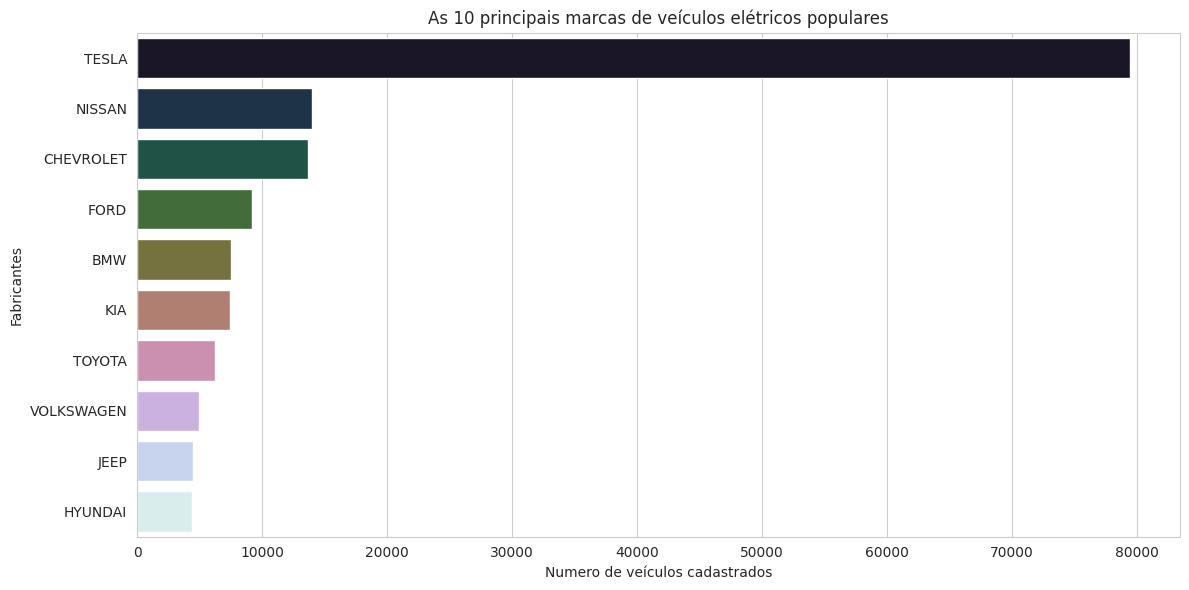

In [17]:
# analisando a popularidade dos fabricantes de VE
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('As 10 principais marcas de veículos elétricos populares')
plt.xlabel('Numero de veículos cadastrados')
plt.ylabel('Fabricantes')
plt.tight_layout()

O gráfico acima mostra que:

- A TESLA lidera por uma margem substancial com o maior número de veículos registados.
- A NISSAN é o segundo fabricante mais popular, seguida pela CHEVROLET, embora ambas tenham significativamente menos registos do que a TESLA.
- FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP e HYUNDAI seguem em ordem decrescente do número de veículos cadastrados.

A seguir, vamos nos aprofundar nos modelos mais populares desses principais fabricantes para obter uma compreensão mais detalhada das preferências do consumidor no nível do modelo:

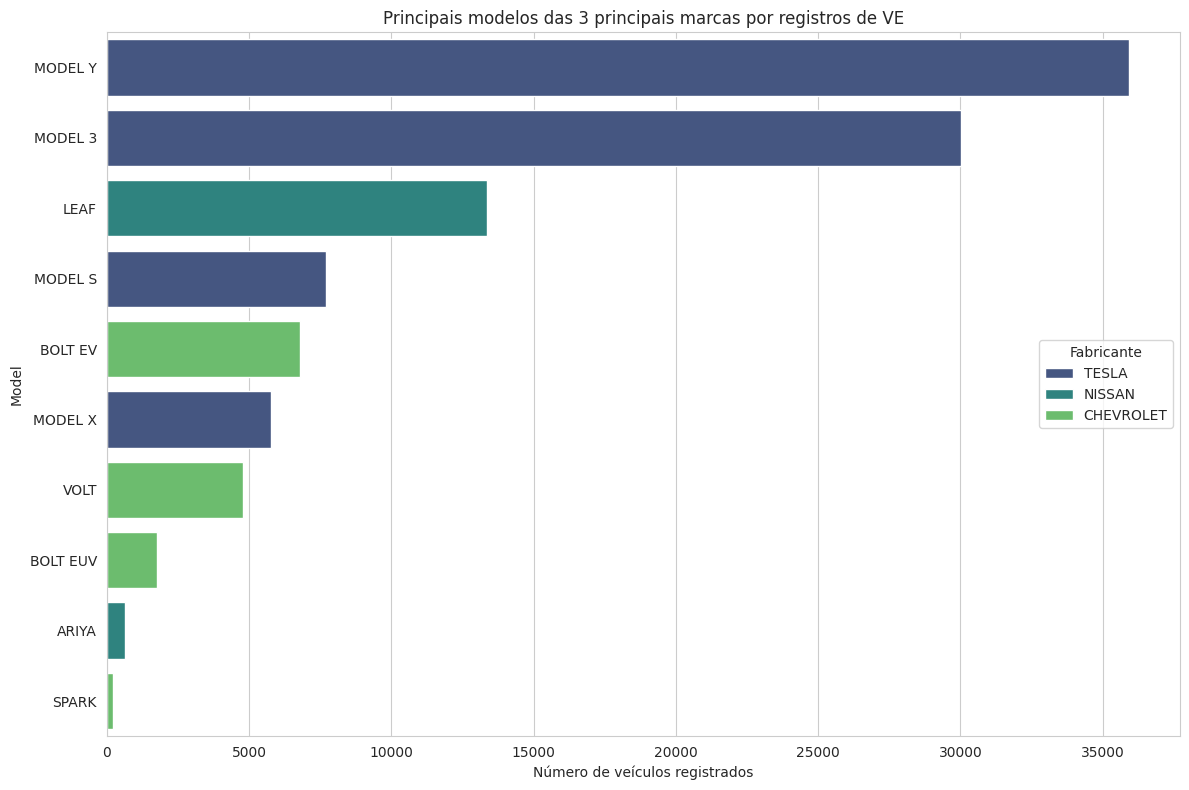

In [18]:
# selecionando os 3 principais fabricantes com base no número de veículos registrados.
top_3_makes = ev_make_distribution.head(3).index

# filtrando o conjunto de dados para esses principais fabricantes
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analisando a popularidade dos modelos VE entre esses principais fabricantes
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizando os 10 principais modelos desses fabricantes para maior clareza
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Principais modelos das 3 principais marcas por registros de VE')
plt.xlabel('Número de veículos registrados')
plt.ylabel('Model')
plt.legend(title='Fabricante', loc='center right')
plt.tight_layout()
plt.show()


O gráfico acima mostra a distribuição dos registros de veículos elétricos entre os diferentes modelos dos três principais fabricantes: TESLA, NISSAN e CHEVROLET. Aqui estão as descobertas:

- O MODELO Y e o MODELO 3 da TESLA são os veículos mais registrados, sendo o MODELO Y o maior número de registros.
- O LEAF da NISSAN é o terceiro modelo mais registrado e o veículo não TESLA mais registrado.
- O MODEL S e MODEL X da TESLA também possuem um número significativo de registros.
- O BOLT EV e o VOLT da CHEVROLET são os próximos no ranking com registros consideráveis, seguidos pelo BOLT EUV.
- O ARIYA da NISSAN e o SPARK da CHEVROLET têm o menor número de matrículas entre os modelos apresentados.

A seguir, exploraremos a autonomia elétrica dos veículos, que é um fator crítico para analisar o tamanho do mercado de veículos elétricos. A autonomia elétrica indica a distância que um VE pode percorrer com uma única carga, e os avanços na tecnologia de baterias têm aumentado constantemente essas autonomias ao longo dos anos. Então, vamos analisar a distribuição das autonomias elétricas no conjunto de dados e identificar quaisquer tendências notáveis, como melhorias ao longo do tempo ou variações entre diferentes tipos de veículos ou fabricantes:

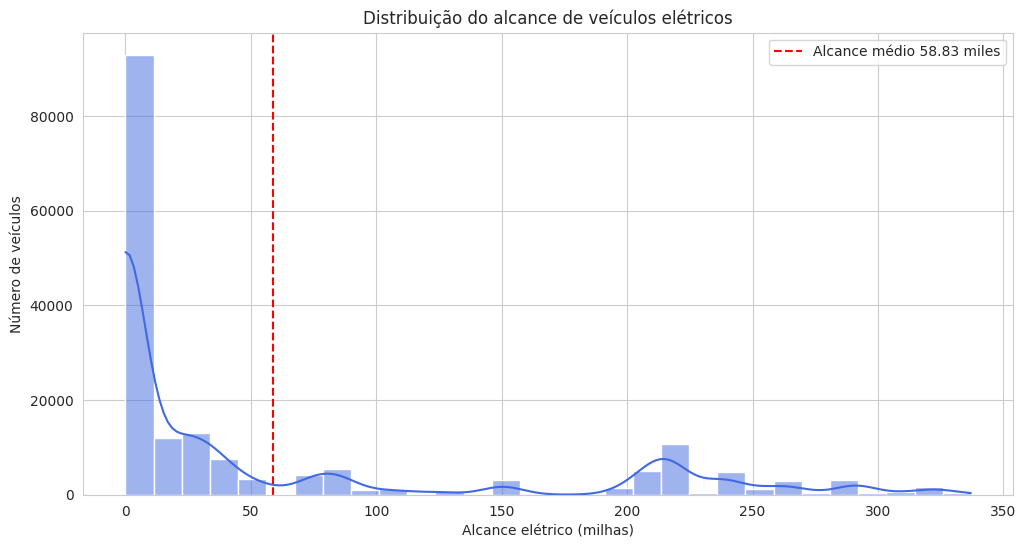

In [21]:
# analisando a distribuição da autonomia elétrica
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribuição do alcance de veículos elétricos')
plt.xlabel('Alcance elétrico (milhas)')
plt.ylabel('Número de veículos')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Alcance médio {ev_data["Electric Range"].mean():.2f} miles')
plt.legend();

O gráfico acima mostra a autonomia elétrica média. As principais observações do gráfico incluem:

- Há uma alta frequência de veículos com baixa autonomia elétrica, com um pico significativo ocorrendo pouco antes dos 80 quilômetros.
- A distribuição é enviesada para a direita, com uma cauda longa que se estende para autonomias mais elevadas, embora o número de veículos com autonomias mais elevadas seja muito menos frequente.
- A autonomia elétrica média para este conjunto de veículos é de aproximadamente 58,84 milhas, o que é relativamente baixo em comparação com as autonomias mais elevadas mostradas no gráfico.
- Apesar da presença de veículos eléctricos com autonomias que se estendem até cerca de 350 milhas, a maioria dos veículos tem uma autonomia abaixo da média.

Isto sugere que, embora existam veículos elétricos disponíveis com autonomia elétrica elevada, a autonomia média é distorcida para baixo devido a um número substancial de veículos com autonomias mais curtas.

Agora, vamos nos aprofundar na tendência das autonomias elétricas ao longo dos anos de modelo, o que pode fornecer insights sobre como os avanços na tecnologia de baterias e no design dos veículos influenciaram as capacidades de autonomia elétrica dos veículos elétricos ao longo do tempo.
Uma tendência positiva nesta análise indicaria melhorias contínuas, oferecendo aos consumidores VE com autonomias de condução mais longas e potencialmente abordando uma das principais preocupações relativas ao mercado de VE:

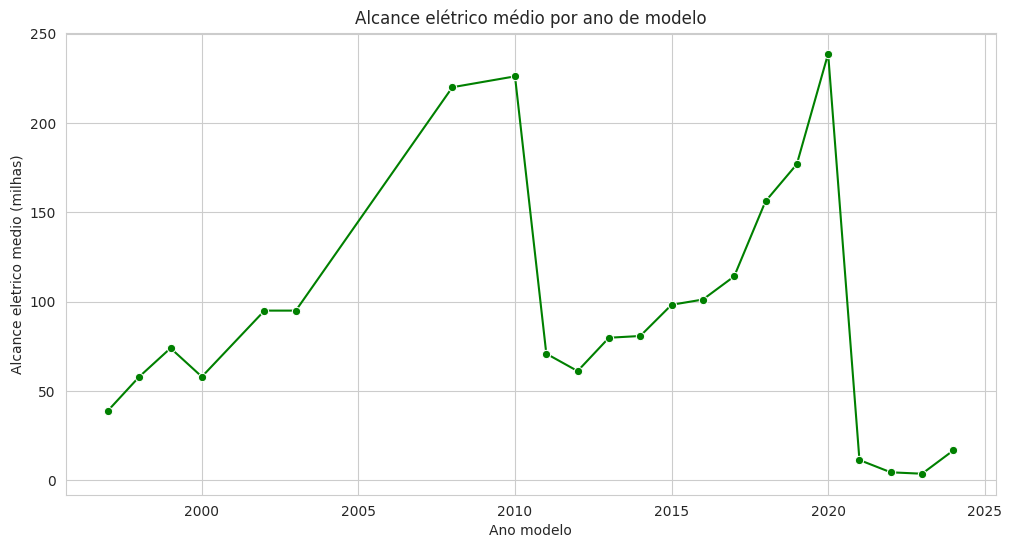

In [22]:
# calculando a autonomia elétrica média por ano de modelo
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Alcance elétrico médio por ano de modelo')
plt.xlabel('Ano modelo')
plt.ylabel('Alcance eletrico medio (milhas)')
plt.grid(True)
plt.show()

O gráfico acima mostra a progressão da autonomia elétrica média dos veículos entre o ano 2000 e 2024.
**Principais conclusões do gráfico:**

- Há uma tendência geral de aumento na autonomia elétrica média dos VE ao longo dos anos, indicando melhorias na tecnologia e na eficiência da bateria.
- Há um pico notável por volta do ano 2020, quando a faixa média atinge seu ponto mais alto.
- Após 2020, verifica-se uma queda significativa no intervalo médio, o que pode indicar que os dados dos anos seguintes podem estar incompletos ou refletir a introdução de vários modelos de intervalo inferior.
- Após a queda acentuada, verifica-se uma ligeira recuperação do intervalo médio no ano mais recente apresentado no gráfico.
- Os dados sugerem que, embora tenha havido flutuações, a tendência geral ao longo das últimas duas décadas tem sido no sentido de aumentar a autonomia elétrica dos VE.

A seguir, vamos explorar como as gamas elétricas variam entre os principais fabricantes e modelos. Esta análise pode revelar como diferentes fabricantes estão a abordar o aspecto crucial da autonomia eléctrica e destacar quais os modelos que se destacam pelas suas capacidades de autonomia superiores:

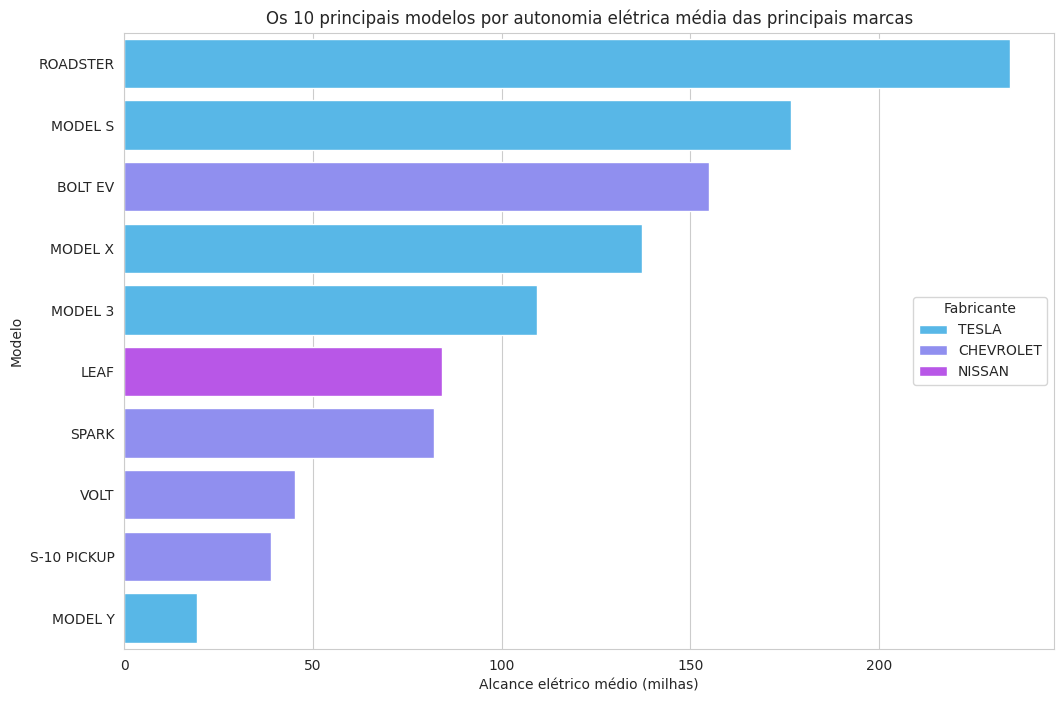

In [24]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# os 10 principais modelos com maior autonomia elétrica média
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Os 10 principais modelos por autonomia elétrica média das principais marcas')
plt.xlabel('Alcance elétrico médio (milhas)')
plt.ylabel('Modelo')
plt.legend(title='Fabricante', loc='center right')
plt.show()

O TESLA ROADSTER tem a maior autonomia elétrica média entre os modelos listados. Os modelos da TESLA (ROADSTER, MODEL S, MODEL X e MODEL 3) ocupam a maioria das primeiras posições, indicando que, em média, os veículos da TESLA têm autonomias elétricas mais elevadas. O CHEVROLET BOLT EV é um caso atípico entre os modelos CHEVROLET, tendo um alcance substancialmente maior que o VOLT e o S-10 PICKUP do mesmo fabricante. O LEAF da NISSAN e o SPARK da CHEVROLET estão na metade inferior do gráfico, sugerindo faixas médias mais modestas.

**Análise estimada do tamanho do mercado de veículos elétricos nos Estados Unidos:**

Agora, vamos avançar para encontrar o tamanho estimado do mercado de veículos elétricos nos Estados Unidos. Primeiro contarei o número de EVs registrados todos os anos:

In [25]:
# calcular o número de VEs registrados a cada ano
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

O conjunto de dados fornece o número de veículos eléctricos registados cada ano de 1997 a 2024. No entanto, os dados para 2024 estão incompletos, uma vez que contêm apenas os dados até Março. Aqui está um resumo dos registros de EV nos últimos anos:

Em 2021, foram registrados 19.063 VEs.
Em 2022, o número aumentou para 27.708 EVs.
Em 2023, foi observado um salto significativo para 57.519 VEs.
Para 2024, atualmente, estão registrados 7.072 VEs, o que sugere dados parciais.

Para prever o número total de VEs que deverão ser registados em 2024, podemos utilizar uma abordagem baseada na taxa de crescimento de anos completos anteriores.

Calcularemos a Taxa Composta de Crescimento Anual (CAGR) entre um ano recente com dados completos (2023) e um ano anterior para projetar os números de 2024. Além disso, utilizando esta taxa de crescimento, podemos estimar o tamanho do mercado para os próximos cinco anos. Vamos prosseguir com estes cálculos:

In [36]:
from scipy.optimize import curve_fit
import numpy as np

# filtre o conjunto de dados para incluir anos com dados completos, assumindo que 2023 é o último ano completo
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# defina uma função de crescimento exponencial para ajustar os dados
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# preparar os dados para ajuste de curva
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# ajustar os dados à função de crescimento exponencial
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use a função ajustada para prever o número de VEs para 2024 e os próximos cinco anos
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# crie um dicionário para exibir os valores previstos para facilitar a interpretação
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))
33
print(forecasted_evs)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


Agora, vamos traçar os dados estimados do tamanho do mercado:

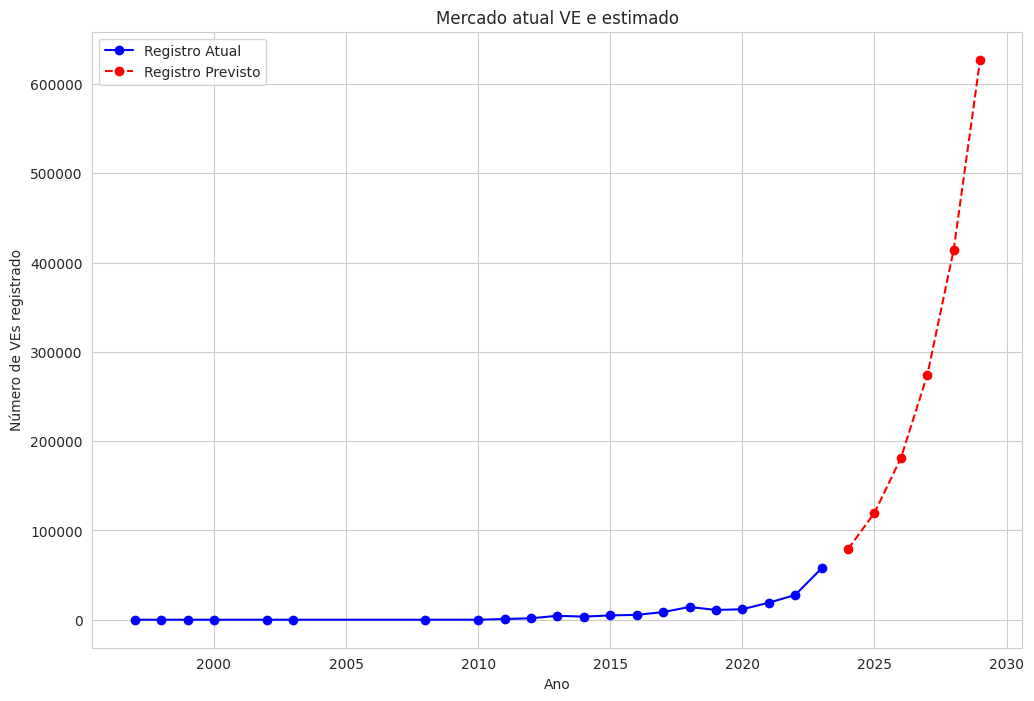

In [38]:
# preparar dados para plotagem
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# valores reais e previstos
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Registro Atual')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Registro Previsto')

plt.title('Mercado atual VE e estimado')
plt.xlabel('Ano')
plt.ylabel('Número de VEs registrado')
plt.legend()
plt.grid(True)

plt.show()

No gráfico acima, podemos ver:

- O número de registos efetivos de VE permaneceu relativamente baixo e estável até cerca de 2010, após o qual houve uma tendência ascendente consistente e acentuada, sugerindo um aumento significativo na adoção de VE.
- Os registos de VE previstos prevêem um aumento ainda mais dramático num futuro próximo, prevendo-se que o número de registos aumente acentuadamente nos próximos anos.

Dada a tendência crescente nos registos reais de VE e a aceleração projetada de acordo com os dados de previsão, podemos concluir que o tamanho do mercado de VE deverá expandir-se consideravelmente. O aumento acentuado nos registos previstos sugere que a adopção de VE pelos consumidores está a aumentar, e esta tendência deverá continuar. Globalmente, os dados apontam para um futuro promissor para a indústria dos VE, indicando uma mudança significativa nas preferências dos consumidores e um potencial aumento no investimento relacionado e nas oportunidades de negócio.

## Resumo:
Portanto, a análise do tamanho do mercado é um aspecto crucial da pesquisa de mercado que determina o volume potencial de vendas dentro de um determinado mercado. Ajuda as empresas a compreender a magnitude da procura, avaliar os níveis de saturação do mercado e identificar oportunidades de crescimento. A partir da nossa análise da dimensão do mercado de veículos eléctricos, encontrámos um futuro promissor para a indústria de veículos eléctricos, indicando uma mudança significativa nas preferências dos consumidores e um potencial aumento no investimento relacionado e nas oportunidades de negócio.

